In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, roc_curve, auc, mean_squared_error, recall_score, precision_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
validation_df = pd.read_csv('dataset_tratado/validation_df.csv')
train_df = pd.read_csv('dataset_tratado/train_df.csv')

In [3]:
train_df.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction
0,-0.277804,-0.089306,-1.446976,-0.754370,-0.451942,-0.812200,0.026713,-0.568924,-0.797232,-1.436397,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0
1,-0.216967,-1.004828,-1.446976,-2.083373,-1.279667,-0.812200,-1.460984,-1.438593,-1.564104,-1.436397,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0
2,1.668967,-0.408911,1.656614,-0.754370,1.203508,0.852722,0.770562,1.170413,0.736513,0.832220,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0
3,0.999764,1.976030,0.622084,1.239135,0.375783,0.020261,0.026713,0.300744,1.503385,0.832220,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0
4,1.486457,-0.307045,-0.412446,-0.754370,-0.451942,0.852722,0.770562,-0.568924,0.736513,0.832220,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0


In [4]:
X_train = train_df.drop(columns=['satisfaction']).values
y_train = train_df['satisfaction'].values

In [5]:
X_validation = validation_df.drop(columns=['satisfaction']).values
y_validation = validation_df['satisfaction'].values

### Treinando Random Forest

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

### Acurácia

In [7]:
y_pred = rf.predict(X_validation)

print("Acurácia:", accuracy_score(y_validation, y_pred))

Acurácia: 0.7202818627450981


### Mean Squared Error

In [8]:
mse = mean_squared_error(y_validation, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.27971813725490197


### Precisão

In [9]:
precision = precision_score(y_validation, y_pred, average='macro') # Calcula a precisão para cada classe e depois faz a média (não leva em conta o desequilíbrio das classes)
print(f"Precision Score Macro: {precision}")

precision = precision_score(y_validation, y_pred, average='micro') # Calcula a métrica globalmente contando os totais verdadeiros positivos, falsos negativos, e falsos positivos
print(f"Precision Score Micro: {precision}")

precision = precision_score(y_validation, y_pred, average='weighted') # Calcula a precisão para cada classe e depois faz a média ponderada pelo suporte (leva em conta o desequilíbrio das classes)
print(f"Precision Score Weighted: {precision}")

Precision Score Macro: 0.8091497044734453
Precision Score Micro: 0.7202818627450981
Precision Score Weighted: 0.8091497044734454


### Recall

In [10]:
recall = recall_score(y_validation, y_pred, average='macro')
print(f"Recall: {recall}")

Recall: 0.7202818627450981


F1 Score

In [11]:
test_f1 = f1_score(y_validation, y_pred, average='macro')
print("Test F1-Score:", test_f1)

Test F1-Score: 0.6986235232331969


### Matriz de confusão

In [12]:
def plot_matrix(cm: np.ndarray):
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_percent, annot=True, cmap='Blues', fmt='.1%', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

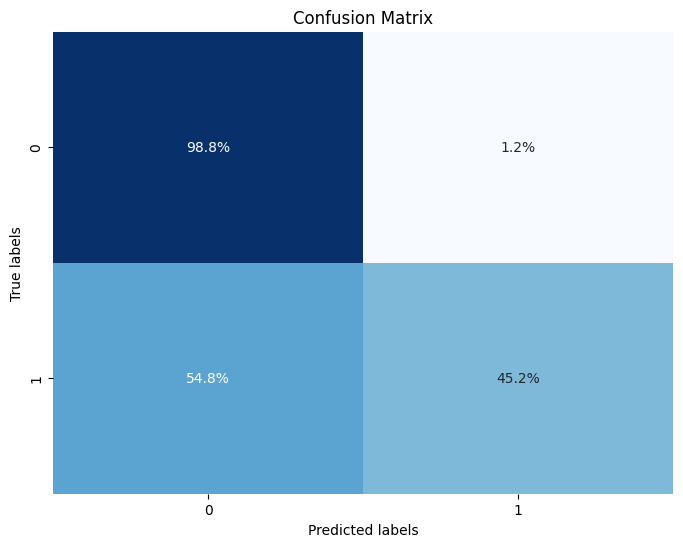

In [13]:
cm = confusion_matrix(y_validation, y_pred)
plot_matrix(cm)

### Curva ROC

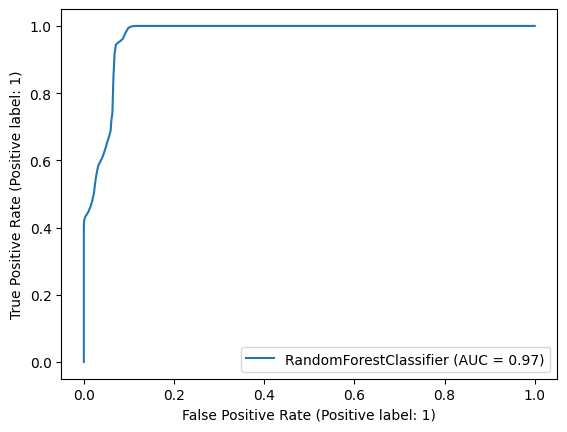

In [14]:
# TODO: Plotar a curva ROC
from sklearn.metrics import RocCurveDisplay

rf_roc = RocCurveDisplay.from_estimator(rf, X_validation, y_validation)
plt.show()

### Curva KS

In [18]:
# Predict probabilities for the positive class
y_prob = rf.predict_proba(X_validation)[:, 1]

In [19]:
# Separate the probabilities by class
prob_positive = y_prob[y_validation == 1]
prob_negative = y_prob[y_validation == 0]

# Sort the probabilities
prob_positive_sorted = np.sort(prob_positive)
prob_negative_sorted = np.sort(prob_negative)

# Calculate the cumulative distribution
cdf_positive = np.arange(1, len(prob_positive_sorted) + 1) / len(prob_positive_sorted)
cdf_negative = np.arange(1, len(prob_negative_sorted) + 1) / len(prob_negative_sorted)

#### Estatística KS

In [20]:
from scipy import interpolate

# Interpolate to find the maximum difference between CDFs
f_positive = interpolate.interp1d(prob_positive_sorted, cdf_positive, bounds_error=False, fill_value=(0, 1))
f_negative = interpolate.interp1d(prob_negative_sorted, cdf_negative, bounds_error=False, fill_value=(0, 1))

# Define a range of probabilities
prob_range = np.linspace(0, 1, max(len(prob_positive_sorted), len(prob_negative_sorted)))

# Calculate the CDF values for the range of probabilities
cdf_positive_interp = f_positive(prob_range)
cdf_negative_interp = f_negative(prob_range)

# Compute the KS statistic
ks_statistic = np.max(np.abs(cdf_positive_interp - cdf_negative_interp))
print(f'KS Statistic: {ks_statistic:.2f}')

KS Statistic: 0.90


#### Plotando a curva

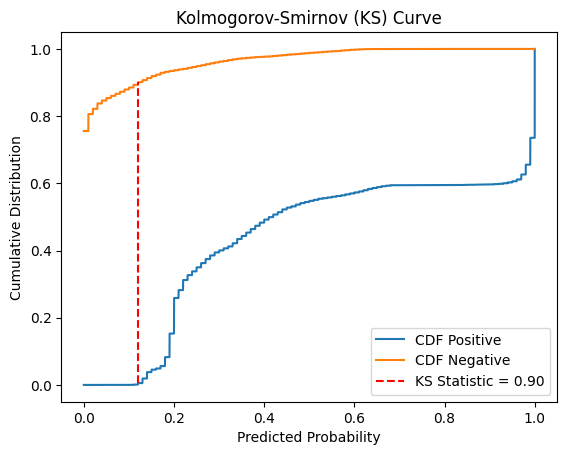

In [21]:
# Plot CDFs
plt.plot(prob_range, cdf_positive_interp, label='CDF Positive')
plt.plot(prob_range, cdf_negative_interp, label='CDF Negative')

# Highlight KS statistic
ks_position = np.argmax(np.abs(cdf_positive_interp - cdf_negative_interp))
plt.plot([prob_range[ks_position], prob_range[ks_position]], 
         [cdf_positive_interp[ks_position], cdf_negative_interp[ks_position]], 
         color='red', linestyle='--', label=f'KS Statistic = {ks_statistic:.2f}')

plt.xlabel('Predicted Probability')
plt.ylabel('Cumulative Distribution')
plt.title('Kolmogorov-Smirnov (KS) Curve')
plt.legend()
plt.show()

* A linha azul (CDF Positivo) começa a subir mais devagar comparado à linha laranja (CDF Negativo). Isso sugere que inicialmente, para valores de probabilidade baixos, há mais amostras negativas do que positivas.
* À medida que as probabilidades aumentam, a linha azul sobe significativamente, indicando que para valores mais altos de probabilidade, a maioria das amostras são positivas.
* A linha azul e a linha laranja são bastante distintas na maior parte do gráfico, o que seria um indicativo de que o modelo é bom em separar as amostras positivas das negativas.
* A linha laranja (CDF negativa) sobe rapidamente em valores mais baixos de probabilidade prevista, o que indica que a maioria das amostras negativas estão corretamente identificadas com baixas probabilidades de serem positivas. O que significa que o modelo tem uma baixa taxa de falsos positivos (é possível confirmar isso pela matriz de confusão)
* A linha azul (CDF positiva) sobe de forma mais gradual e atinge altas probabilidades previstas. Isso mostra que o modelo também é eficaz em identificar amostras positivas, embora o comportamento da linha azul possa indicar que, para algumas amostras positivas, as probabilidades previstas estão distribuídas mais amplamente (também possível ver esta distribuição a partir da matriz de confusão).
